In [6]:
from UZ_utils import *

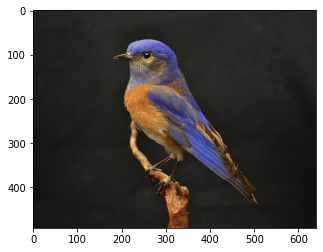

In [7]:
I = imread('./images/bird.jpg')
imshow(I)

(492, 640, 3) float64 1.0


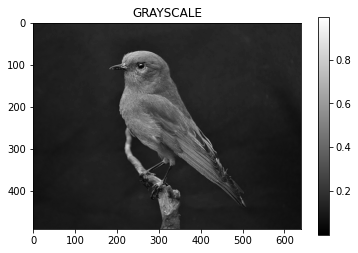

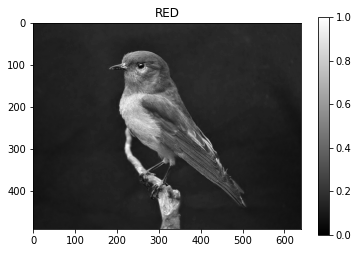

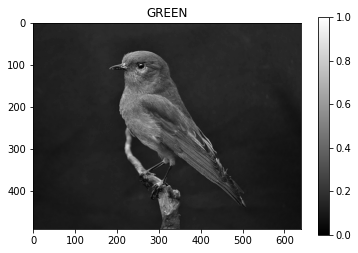

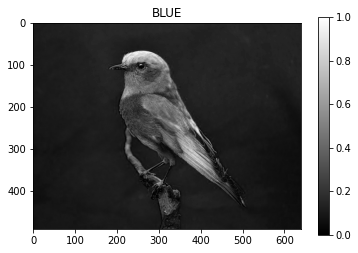

In [8]:
type(I)
print(I.shape, I.dtype, np.max(I))

Ired = I[:,:,0]
Igreen = I[:,:,1]
Iblue = I[:,:,2]

#convert to grayscale by summing the channels and dividing by 3
Igray = (Ired + Igreen + Iblue)/3
imshow(Igray,"GRAYSCALE")
imshow(Ired,"RED")
imshow(Igreen,"GREEN")
imshow(Iblue,"BLUE")





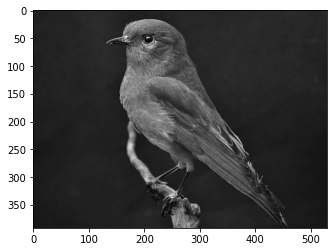

In [9]:
#make cutout

Icutout=I[50:442,50:580,1] 
plt.imshow(Icutout,cmap='gray')
plt.show()

(492, 640, 3) uint8 255


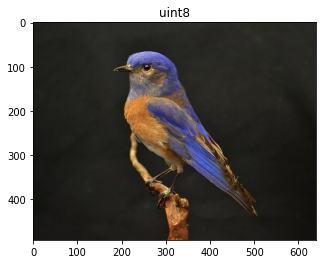

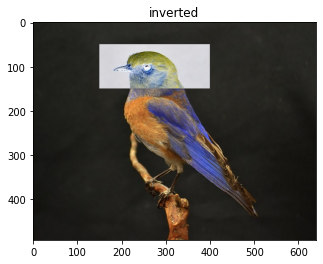

In [10]:
#convert the image to uint8 
I255 = (I*255).astype(np.uint8)
print(I255.shape, I255.dtype, np.max(I255))
imshow(I255, 'uint8')

# invert a part of the image I255
I255[50:150,150:400,:] = 255 - I255[50:150,150:400,:]
imshow(I255, 'inverted')

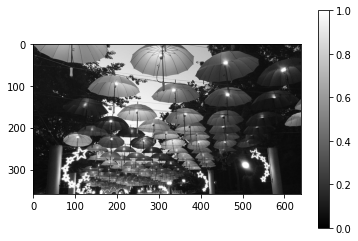

(360, 640) float64 1.0


In [11]:
#open umbrella image
Iumb = imread_gray('./images/umbrellas.jpg')
imshow(Iumb)
print(Iumb.shape, Iumb.dtype, np.max(Iumb))


(360, 640) float64 63.0
(360, 640) uint8 63


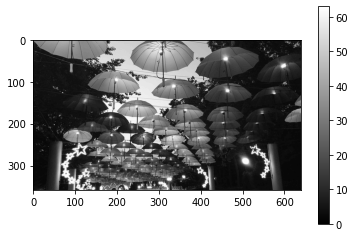

In [12]:
#rescale the image values
Iumb=Iumb*63 
print(Iumb.shape, Iumb.dtype, np.max(Iumb))
#convert to uint8
Iumb=Iumb.astype(np.uint8)
print(Iumb.shape, Iumb.dtype, np.max(Iumb))
imshow(Iumb)

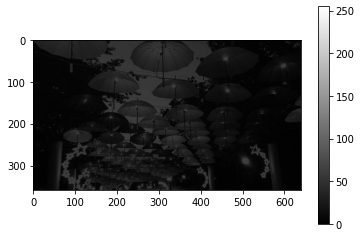

In [13]:


#use vmax to display the image with the correct values
plt.imshow(Iumb,vmax=255)
plt.set_cmap('gray')  # also "hot", "nipy_spectral"
plt.colorbar()


# Exercise 2: Thresholding and histograms



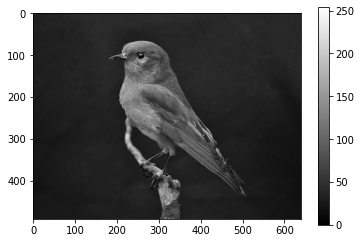

(492, 640) uint8 254 0


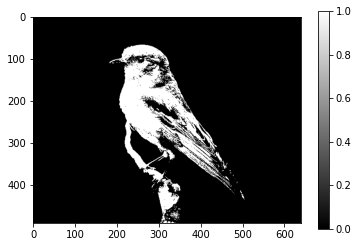

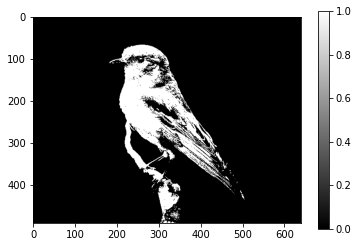

In [14]:
#open bird image
Ibird = imread_gray('./images/bird.jpg')*255
Ibird=Ibird.astype(np.uint8)
imshow(Ibird)

print(Ibird.shape, Ibird.dtype, np.max(Ibird), np.min(Ibird))

threshold = 80
Ibird1 = Ibird.copy()
Ibird1[Ibird1 < threshold] = 0
Ibird1[Ibird1 >= threshold] = 1

Ibird2 = Ibird.copy()
Ibird2=np.where(Ibird2 < threshold, 0, 1)

imshow(Ibird1)
imshow(Ibird2)














In [15]:
def myhist(num_bins, I,minmax=False):

    max_val = 0
    min_val = 0

    if minmax:
        max_val = np.max(I)
        min_val = np.min(I)

    else:
        max_val = 255
        min_val = 0



    H=np.zeros(num_bins)

    bin_edges = np.linspace(min_val, max_val, num_bins + 1,endpoint=True)
   

    for i in I.reshape(-1):
        for j in range(num_bins):
            #calculate the bin index
            if i >= bin_edges[j] and i < bin_edges[j+1]:
                H[j] += 1
                break
            

    #normalize the histogram
    H = H / len(I.reshape(-1))

    return H




(492, 640) uint8 254 0


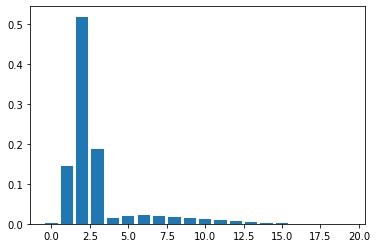

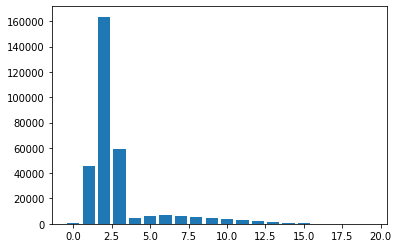

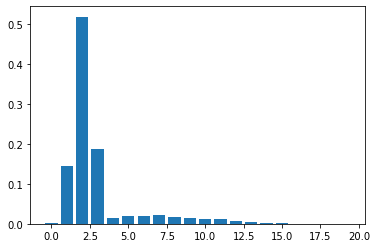

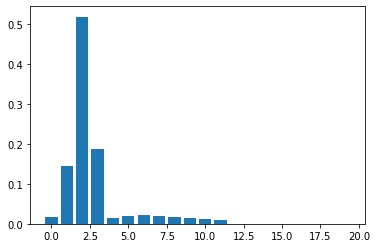

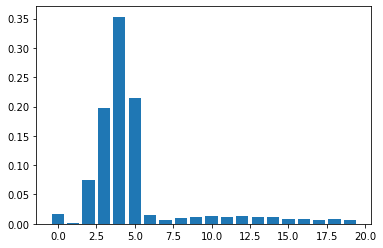

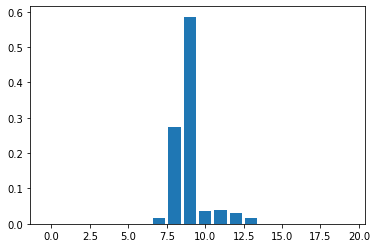

In [16]:
#show the histogram of the bird image

print(Ibird.shape, Ibird.dtype, np.max(Ibird), np.min(Ibird))
H = myhist(20, Ibird,minmax=False)
plt.bar(np.arange(20), H)
plt.show()


H2 = myhist(20, Ibird, minmax=True)
plt.bar(np.arange(20), H2)
plt.show()


#show the difference between the two types of function parameters minmax=False and minmax=True
Ibird3=Ibird.copy()
Ibird3[Ibird3>150]=0

H3 = myhist(20, Ibird3, minmax=False)
plt.bar(np.arange(20), H3)
plt.show()

H4 = myhist(20, Ibird3, minmax=True)
plt.bar(np.arange(20), H4)
plt.show()

test=Ibird3//2+100
H5 = myhist(20, test, minmax=False)
plt.bar(np.arange(20), H5)
plt.show()




#use the numpy histogram function to compare the results and normalize the histogram
# H2, bin_edges = np.histogram(Ibird, bins=20, range=(0, 255), density=True)
# #normalize the histogram
# H2 = H2 / np.sum(H2)

# plt.bar(np.arange(20), H2)
# plt.show()





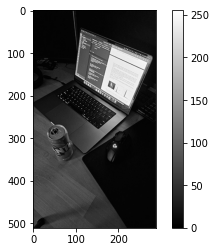

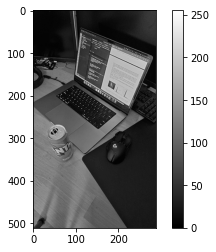

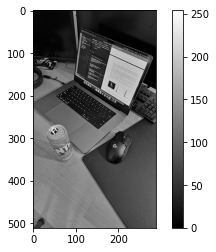

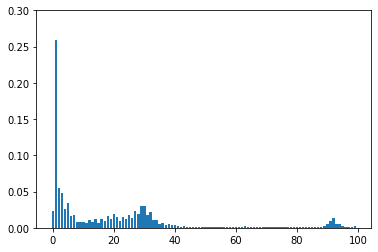

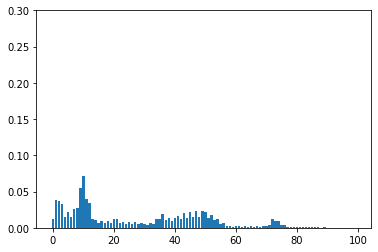

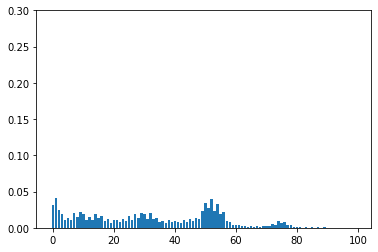

In [17]:
#load 3 images from the images folder
Imac1 = imread_gray('./images/mac1.jpg') * 255
Imac1 = Imac1.astype(np.uint8)
imshow(Imac1)

Imac2 = imread_gray('./images/mac2.jpg') * 255
Imac2 = Imac2.astype(np.uint8)
imshow(Imac2)

Imac3 = imread_gray('./images/mac3.jpg') * 255
Imac3 = Imac3.astype(np.uint8)
imshow(Imac3)

#calculate the histogram of the first image
Hmac1 = myhist(100, Imac1, minmax=False)
plt.bar(np.arange(100), Hmac1)
#make y axis max value 1
plt.ylim(0,0.3)
plt.show()

#calculate the histogram of the second image
Hmac2 = myhist(100, Imac2, minmax=False)
plt.bar(np.arange(100), Hmac2)
plt.ylim(0,0.3)
plt.show()

#calculate the histogram of the third image
Hmac3 = myhist(100, Imac3, minmax=False)
plt.bar(np.arange(100), Hmac3)
plt.ylim(0,0.3)
plt.show()

#every image has different lighting conditions, so the histograms are different






In [18]:
def otsu(I):

    #interclass variance
    interclass_var = np.zeros(256)


    for i,threshold in enumerate(range(np.max(I))):

        tmp_img = np.zeros(I.shape)
        tmp_img[I > threshold] = 1

        #calculate the probabilities of the two classes
        num_pixels = I.shape[0] * I.shape[1]

        W1 = np.count_nonzero(tmp_img) / num_pixels
        W2 = 1 - W1

        if W1 == 0 or W2 == 0:
            interclass_var[i] = 0
            continue

        #calculate the variance of the two classes
        pix1 = I[tmp_img == 1]
        pix2 = I[tmp_img == 0]

        mean1 = np.mean(pix1)
        mean2 = np.mean(pix2)


        interclass_var[i] = W1 * W2 * (mean1 - mean2) ** 2

    #find the threshold with the maximum variance
    threshold = np.argmax(interclass_var)

    return interclass_var , threshold



        




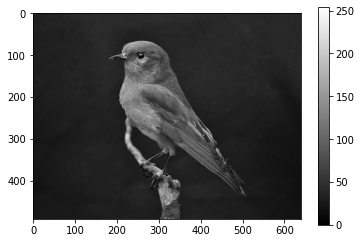

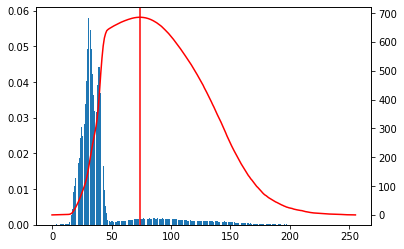

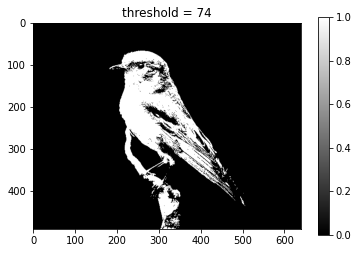

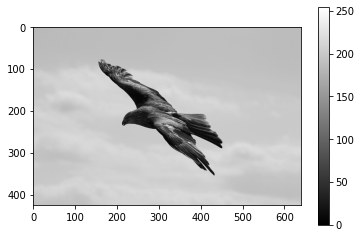

In [19]:
#test the otsu function
import imghdr
from unicodedata import name


Ibird6 = imread_gray('./images/bird.jpg') * 255
Ibird6 = Ibird6.astype(np.uint8)

imshow(Ibird6)

#calculate the tresold
interclass_var, threshold = otsu(Ibird6)

#plot the interclass variance and histogram of the image on the same plot 

Humb = myhist(256, Ibird6, minmax=False)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(np.arange(256), Humb)
ax2 = ax1.twinx()
ax2.plot(interclass_var, 'r')
#mark the threshold as a red line
ax2.axvline(x=threshold, color='r')
plt.show()

#treashold the image
Ibird7 = Ibird6.copy()
Ibird7[Ibird6 > threshold] = 1
Ibird7[Ibird6 <= threshold] = 0

#save the image using plt
plt.imsave('./images/bird_otsu.jpg', Ibird7, cmap='gray')




#show using plt.imshow and 
imshow(Ibird7,"threshold = " + str(threshold))

#open another image
Ieagle = imread_gray('./images/eagle.jpg') * 255
Ieagle = Ieagle.astype(np.uint8)

imshow(Ieagle)

#calculate the tresold
interclass_var, threshold = otsu(Ieagle)

#plot the interclass variance and histogram of the image on the same plot

Humb = myhist(256, Ieagle, minmax=False)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(np.arange(256), Humb)
ax2 = ax1.twinx()
ax2.plot(interclass_var, 'r')
#mark the threshold as a red line
ax2.axvline(x=threshold, color='r')
plt.show()

#treashold the image
Ieagle2 = Ieagle.copy()
Ieagle2[Ieagle > threshold] = 1
Ieagle2[Ieagle <= threshold] = 0

#show using plt.imshow and
imshow(Ieagle2,"threshold = " + str(threshold))
#save the image using plt
plt.imsave('./images/eagle_otsu.jpg', Ieagle2, cmap='gray')





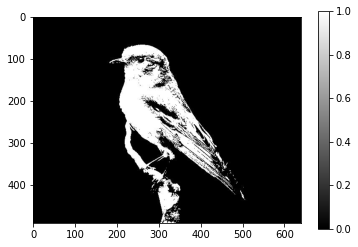

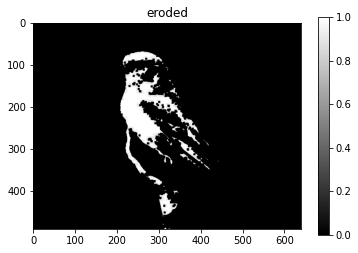

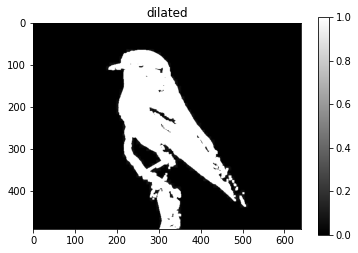

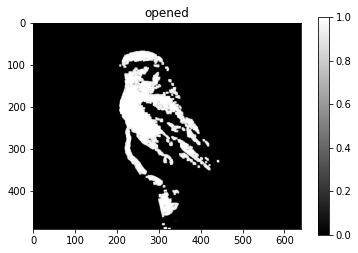

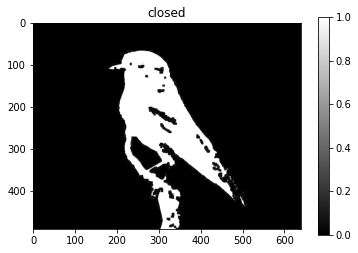

In [ ]:
#exercize 3 

#open bird image
Ibird8 = imread_gray('./images/bird_otsu.jpg') 

#show the image
imshow(Ibird8)

n=5
SE = np.ones((n,n), np.uint8) # create a square structuring element
I_eroded = cv2.erode(Ibird8, SE)
I_dilated = cv2.dilate(Ibird8, SE)

#show the results
imshow(I_eroded, "eroded")
imshow(I_dilated, "dilated")

#opening
I_eroded2 = cv2.erode(Ibird8, SE)
I_opened = cv2.dilate(I_eroded2, SE)

#closing=
I_dilated2 = cv2.dilate(Ibird8, SE)
I_closed = cv2.erode(I_dilated2, SE)

#show the results
imshow(I_opened, "opened")
imshow(I_closed, "closed")






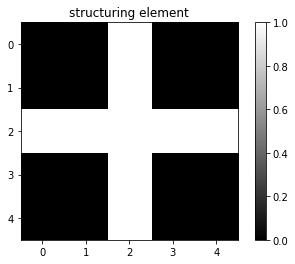

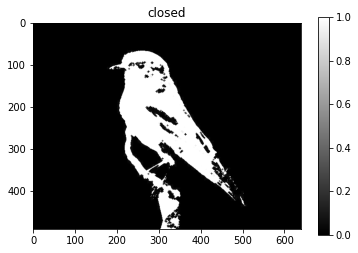

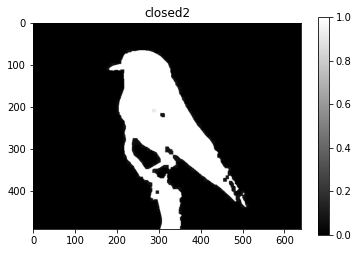

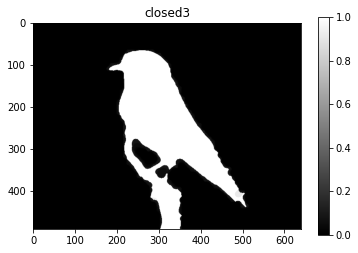

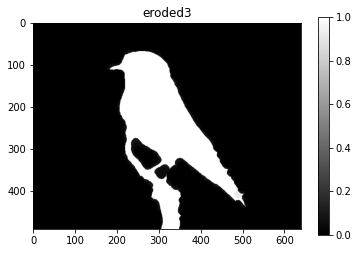

In [ ]:
#trt different structuring elements
n=5
#make a cross structuring element
SE = np.zeros((n,n), np.uint8)
SE[:,n//2] = 1
SE[n//2,:] = 1

#show the structuring element
imshow(SE, "structuring element")


#closing=
I_dilated2 = cv2.dilate(Ibird8, SE)
I_closed = cv2.erode(I_dilated2, SE)

#perform closing again
I_dilated3 = cv2.dilate(I_closed, SE)

#make a square structuring element
n=8
SE = np.ones((n,n), np.uint8)

#perform closing again
I_dilated4 = cv2.dilate(I_dilated3, SE)
I_closed2 = cv2.erode(I_dilated4, SE)


#perform dilation again
elipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(17,17))

#perform closing again
I_dilated5 = cv2.dilate(I_closed2, elipse)
I_closed3 = cv2.erode(I_dilated5, elipse)

#erode with a cross structuring element
n=5
SE = np.zeros((n,n), np.uint8)
SE[:,n//2] = 1
SE[n//2,:] = 1

I_eroded3 = cv2.erode(I_closed3, SE)




#show the results
imshow(I_closed, "closed")
imshow(I_closed2, "closed2")
imshow(I_closed3, "closed3")
imshow(I_eroded3, "eroded3")

#save mask

plt.imsave('./images/bird_mask.jpg', I_eroded3, cmap='gray')





In [ ]:
def immask(I,Imask):
    #expand the mask to have THE SAME nuber of axes as the image which has 3 axes
    print(Imask.shape)
    Imask = np.expand_dims(Imask, axis=2)
    #make shape (492, 640, 3)
    Imask = np.repeat(Imask, 3, axis=2)
    
    print(Imask.shape)
    print(I.shape)

    #make a copy of the image
    I2 = I.copy()

    #set the pixels of the image to 0 where the mask is 0
    I2[Imask == 0] = 0

    return I2

    

    


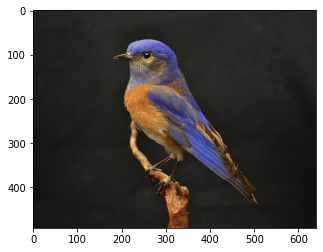

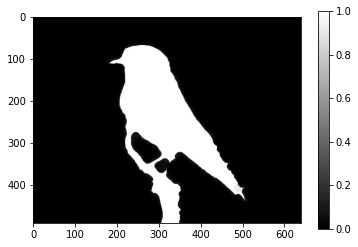

(492, 640)
(492, 640, 3)
(492, 640, 3)


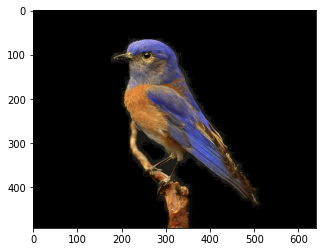

In [ ]:
#open the image
Ibird9 = imread('./images/bird.jpg')

#open the mask
Imask = imread_gray('./images/bird_mask.jpg')


#show the image
imshow(Ibird9)

#show the mask
imshow(Imask)

rem_back=immask(Ibird9, Imask)

imshow(rem_back)

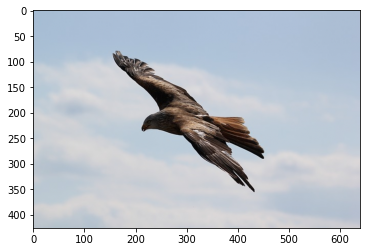

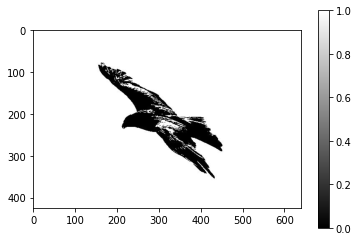

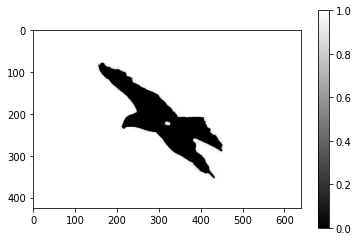

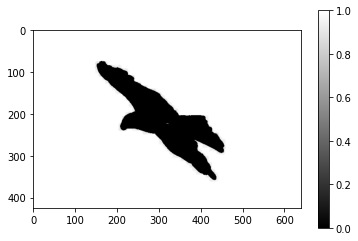

(426, 640)
(426, 640, 3)
(426, 640, 3)


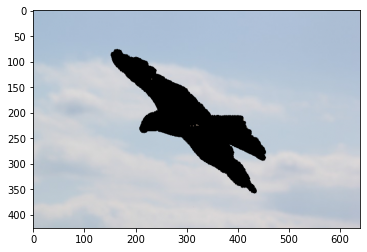

In [ ]:
#open eagle image
Ieagle2 = imread('./images/eagle.jpg')

#open the mask
Imask2 = imread_gray('./images/eagle_otsu.jpg')

#show the image

imshow(Ieagle2)

#show the mask
imshow(Imask2)

#use 

elipse2=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))


#perform opening
I_eroded4 = cv2.erode(Imask2, elipse2)
I_opened2 = cv2.dilate(I_eroded4, elipse2)

#perform the same again
I_eroded5 = cv2.erode(I_opened2, elipse2)


#show the mask
imshow(I_opened2)
imshow(I_eroded5)

#remove the background
rem_back2=immask(Ieagle2, I_eroded5)

imshow(rem_back2)



(494, 640)


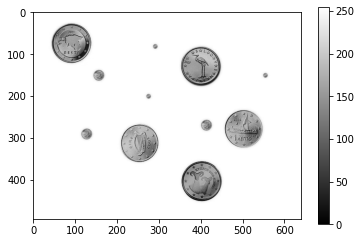

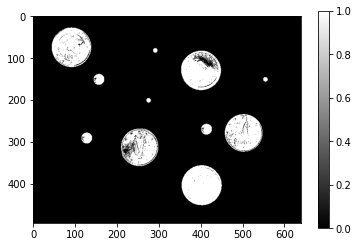

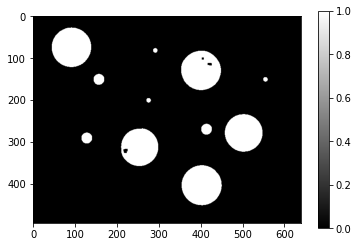

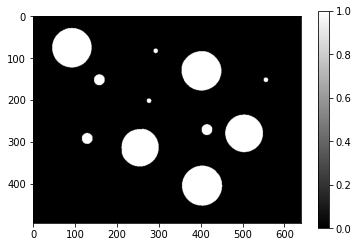

(494, 640)
(494, 640, 3)
(494, 640, 3)


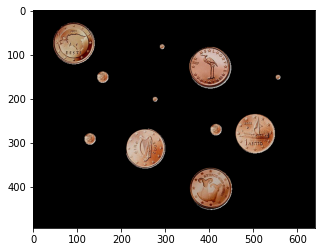

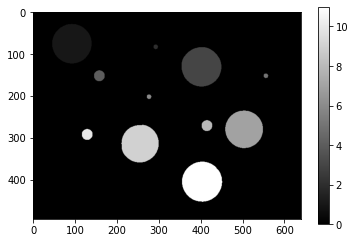

[[     0      0    640    494 280523]
 [    46     28     94     95   6969]
 [   288     77     11     12     93]
 [   355     84     95     94   7010]
 [   146    139     25     26    525]
 [   551    147     11     11     94]
 [   272    197     11     11     93]
 [   459    235     90     90   6328]
 [   403    258     25     26    524]
 [   211    269     89     90   6312]
 [   117    279     25     26    526]
 [   356    357     96     96   7163]]
[280523   6969     93   7010    525     94     93   6328    524   6312
    526   7163]


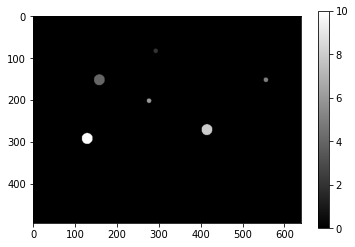

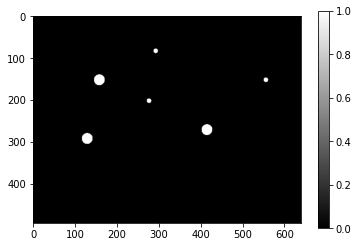

In [ ]:
#open coin image
Icoin = imread_gray('./images/coins.jpg')*255
Icoin=Icoin.astype(np.uint8)

print(Icoin.shape)

#show the image

imshow(Icoin)

#perform otsu thresholding
h, threshold = otsu(Icoin)

#threshold the image
Icoin2 = Icoin.copy()
Icoin2[Icoin > threshold] = 0
Icoin2[Icoin <= threshold] = 1

#perform closing with structuring element
n=5
SE = np.ones((n,n), np.uint8)

I_dilated6 = cv2.dilate(Icoin2, SE)
I_closed4 = cv2.erode(I_dilated6, SE)

#make structuring element bigger
n=10
SE = np.ones((n,n), np.uint8)


#perform closing again
I_dilated7 = cv2.dilate(I_closed4, SE)
I_closed5 = cv2.erode(I_dilated7, SE)

#show the image

imshow(Icoin2)

imshow(I_closed4)

imshow(I_closed5)

#mask the image

Icoinog = imread('./images/coins.jpg')
rem_back3=immask(Icoinog, I_closed5)

imshow(rem_back3)

#use connnected components 

#find the connected components cv2.connectedComponentsWithStats
n, labels, stats, centroids = cv2.connectedComponentsWithStats(I_closed5)

#show the labels
imshow(labels)

#show the stats
print(stats)
#get stat for diameter
diameter = stats[:,4]
print(diameter)

#remove the coins with diameter bigger than 700

for i in range(1, n):
    if diameter[i] > 700:
        labels[labels == i] = 0

#show the labels
imshow(labels)

#make a mask from labels

I_mask = labels.copy()
I_mask[I_mask > 0] = 1

#show the mask
imshow(I_mask)







